# Combining classifiers via majority vote

In [46]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X, y = iris.data[50:, [1, 2]], iris.target[50:]   #150筆取100筆,4個特徵只取2個
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test =\
       train_test_split(X, y, 
                        test_size=0.5, 
                        random_state=1,
                        stratify=y)

In [47]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

clf1 = LogisticRegression(penalty='l2', 
                          C=0.001,
                          random_state=1)

clf2 = DecisionTreeClassifier(max_depth=1,
                              criterion='entropy',
                              random_state=0)

clf3 = KNeighborsClassifier(n_neighbors=1,
                            p=2,
                            metric='minkowski')


#舊寫法
pipe1 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf1]])
pipe3 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf3]])

clf_labels = ['Logistic regression', 'Decision tree', 'KNN']

print('10-fold cross validation:\n')
for clf, label in zip([pipe1, clf2, pipe3], clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

10-fold cross validation:

ROC AUC: 0.92 (+/- 0.15) [Logistic regression]
ROC AUC: 0.87 (+/- 0.18) [Decision tree]
ROC AUC: 0.85 (+/- 0.13) [KNN]


# bagging

In [48]:
from sklearn import neighbors
from sklearn import datasets
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [49]:
iris = datasets.load_iris()
x_data = iris.data[:,:2]#150*2
y_data = iris.target

x_train,x_test,y_train,y_test = train_test_split(x_data, y_data)

In [50]:
knn = neighbors.KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [51]:
def plot(model):
    
    x_min, x_max = x_data[:, 0].min() - 1, x_data[:, 0].max() + 1
    y_min, y_max = x_data[:, 1].min() - 1, x_data[:, 1].max() + 1

    # 建立網格矩陣
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    z = model.predict(np.c_[xx.ravel(), yy.ravel()])# ravel与flatten类似，多维数据转一维。flatten不会改变原始数据，ravel会改变原始数据
    z = z.reshape(xx.shape)
    # 等高線圖
    cs = plt.contourf(xx, yy, z)

### 單次knn/決策樹

d:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


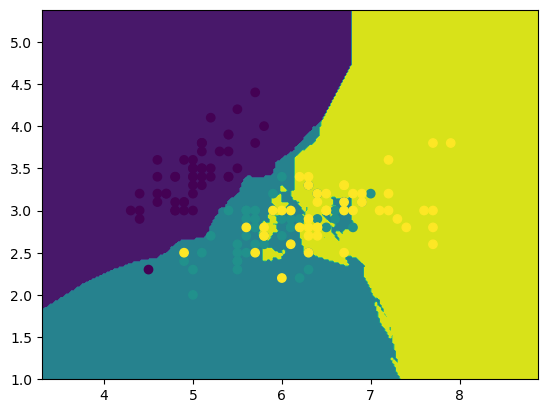

d:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7894736842105263

In [52]:
plot(knn)

plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)
plt.show()

knn.score(x_test, y_test)

In [53]:
dtree = tree.DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

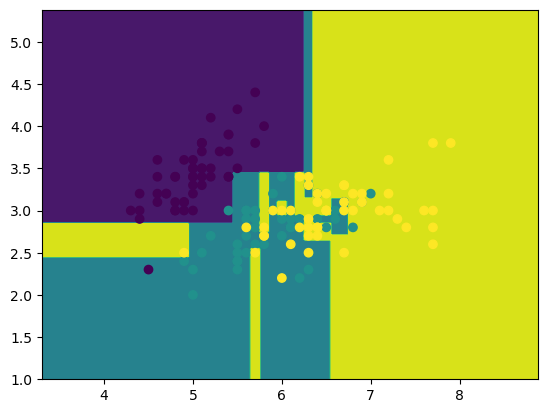

0.7105263157894737

In [54]:
plot(dtree)

plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)
plt.show()

dtree.score(x_test, y_test)

### 利用bagging 跑150次knn/150次決策樹

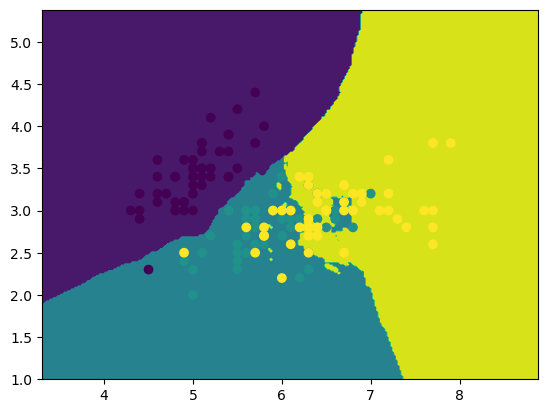

0.7631578947368421

In [55]:
bagging_knn = BaggingClassifier(knn, n_estimators=150)

bagging_knn.fit(x_train, y_train)
plot(bagging_knn)

plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)
plt.show()
bagging_knn.score(x_test, y_test)

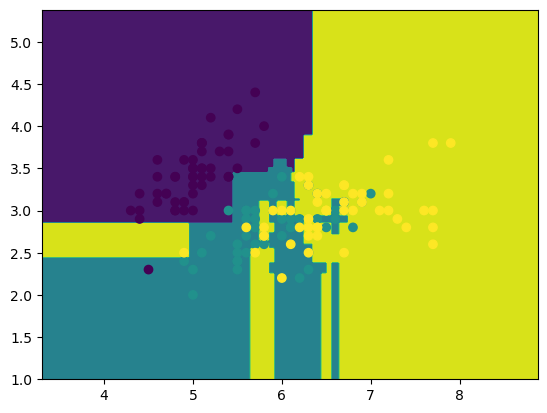

0.7105263157894737

In [56]:
bagging_tree = BaggingClassifier(dtree, n_estimators=150)

bagging_tree.fit(x_train, y_train)
plot(bagging_tree)

plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)
plt.show()
bagging_tree.score(x_test, y_test)

# AdaBoost

In [57]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification   #製作分類資料
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = make_classification(
    n_samples=1000, n_features=50, n_informative=30, 
    n_clusters_per_class=3, random_state=11)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=11)

#單一棵
clf = DecisionTreeClassifier(random_state=11)
clf.fit(X_train, y_train)
print('Decision tree accuracy: %s' % clf.score(X_test, y_test))

Decision tree accuracy: 0.688


[0.676, 0.656, 0.72, 0.676, 0.724, 0.704, 0.736, 0.712, 0.732, 0.736, 0.732, 0.74, 0.74, 0.72, 0.748, 0.74, 0.752, 0.724, 0.74, 0.74, 0.724, 0.736, 0.744, 0.736, 0.72, 0.72, 0.732, 0.728, 0.748, 0.74, 0.736, 0.744, 0.74, 0.748, 0.76, 0.76, 0.744, 0.744, 0.744, 0.748, 0.756, 0.744, 0.74, 0.752, 0.748, 0.752, 0.772, 0.772, 0.772, 0.768]


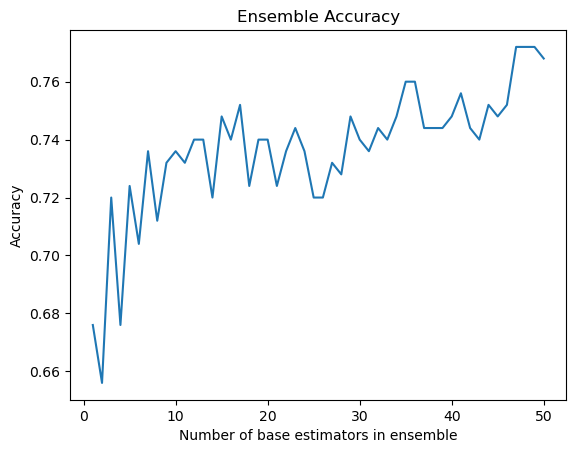

In [58]:
# When an argument for the base_estimator parameter is not passed, the default DecisionTreeClassifier is used
accuracies=[]   #紀錄每次修正內容
clf = AdaBoostClassifier(n_estimators=50, random_state=11)
clf.fit(X_train, y_train)
accuracies.append(clf.score(X_test, y_test))
print(list(clf.staged_score(X_test, y_test)))


plt.title('Ensemble Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of base estimators in ensemble')
plt.plot(range(1, 51), 
         [accuracy for accuracy in clf.staged_score(X_test, y_test)])